In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-5.236345177305992 -8.125046881500822
86.45366335672165 -40.51345634735503
14.926036443560832 167.67572844213987
-32.127542801377544 -45.73446084185272
70.26561152068268 -42.738395865662454
44.784652004293946 -153.91091270146651
77.29818372590998 104.3854153861995
28.993609919498724 -158.45165877474977
-2.6909857205453704 106.61927708888334
31.16758477675802 73.2990622625897
45.0001976009834 10.067740363286049
78.9901943360154 100.04713339142938
57.639866419431854 -4.087889797635398
65.08688430910095 34.587677307083396
67.43753983516788 -124.3636238647725
-55.6917923196039 -83.59854371074165
-66.9197418957271 24.398093369755856
-38.93155979198472 70.26335257717733
45.423582465874546 -64.94203259434285
-44.399828583159305 -166.58127336532038
-26.887591012573324 -120.20243865479907
-61.4027061678229 -37.90555766119874
57.281910978379244 147.0564147419396
-19.801357158063425 -59.46971091368542
-64.63427527850156 128.13057725730982
-10.794037764268921 84.41182004039263
83.4573712211724 4.7

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

577

In [6]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval          ")
print("----------------------------------")

# Create counters
set_count = 1
record_count = 1
        
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        # Create counters
        set_count += 1
        record_count = 1
        time.sleep(60)
        
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count}|{city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
     

Beginning Data Retrieval          
----------------------------------
Processing Record 1 of Set 1|georgetown
Processing Record 2 of Set 1|ilulissat
Processing Record 3 of Set 1|butaritari
Processing Record 4 of Set 1|laguna
Processing Record 5 of Set 1|tasiilaq
Processing Record 6 of Set 1|kodiak
Processing Record 7 of Set 1|khatanga
Processing Record 8 of Set 1|kapaa
Processing Record 9 of Set 1|mentok
City not found. Skipping...
Processing Record 10 of Set 1|tandlianwala
Processing Record 11 of Set 1|cremona
Processing Record 12 of Set 1|cromarty
Processing Record 13 of Set 1|kem
Processing Record 14 of Set 1|norman wells
Processing Record 15 of Set 1|punta arenas
Processing Record 16 of Set 1|bredasdorp
Processing Record 17 of Set 1|mahebourg
Processing Record 18 of Set 1|berwick
Processing Record 19 of Set 1|avarua
Processing Record 20 of Set 1|rikitea
Processing Record 21 of Set 1|mar del plata
Processing Record 22 of Set 1|arman
Processing Record 23 of Set 1|mayor pablo lagerenz

Processing Record 46 of Set 4|sangar
Processing Record 47 of Set 4|mazatlan
Processing Record 48 of Set 4|mandan
Processing Record 49 of Set 4|belmonte
Processing Record 50 of Set 4|san lawrenz
Processing Record 1 of Set 5|kaeo
Processing Record 2 of Set 5|sibu
Processing Record 3 of Set 5|kamaishi
Processing Record 4 of Set 5|san cristobal
Processing Record 5 of Set 5|ritchie
Processing Record 6 of Set 5|huarmey
Processing Record 7 of Set 5|mogadishu
Processing Record 8 of Set 5|tongsa
City not found. Skipping...
Processing Record 9 of Set 5|muisne
Processing Record 10 of Set 5|bluff
Processing Record 11 of Set 5|severo-kurilsk
Processing Record 12 of Set 5|palu
Processing Record 13 of Set 5|comodoro rivadavia
Processing Record 14 of Set 5|camacha
Processing Record 15 of Set 5|deputatskiy
Processing Record 16 of Set 5|seddon
Processing Record 17 of Set 5|la gomera
Processing Record 18 of Set 5|hokitika
Processing Record 19 of Set 5|kipushi
Processing Record 20 of Set 5|jardim
Processi

Processing Record 46 of Set 8|ipu
Processing Record 47 of Set 8|nhlangano
Processing Record 48 of Set 8|teguldet
Processing Record 49 of Set 8|bharatpur
Processing Record 50 of Set 8|vostok
Processing Record 1 of Set 9|eureka
Processing Record 2 of Set 9|yining
Processing Record 3 of Set 9|tefe
Processing Record 4 of Set 9|souillac
Processing Record 5 of Set 9|concepcion
Processing Record 6 of Set 9|baykit
Processing Record 7 of Set 9|nata
Processing Record 8 of Set 9|kuva
City not found. Skipping...
Processing Record 9 of Set 9|puerto madero
Processing Record 10 of Set 9|jinxiang
Processing Record 11 of Set 9|jinchengjiang
City not found. Skipping...
Processing Record 12 of Set 9|dezhou
Processing Record 13 of Set 9|chino valley
Processing Record 14 of Set 9|koungou
Processing Record 15 of Set 9|leningradskiy
Processing Record 16 of Set 9|roma
Processing Record 17 of Set 9|loa janan
Processing Record 18 of Set 9|jiuquan
Processing Record 19 of Set 9|mubi
Processing Record 20 of Set 9|

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,77.23,86,20,2.30,MY,2023-01-25 23:50:40
1,Ilulissat,69.2167,-51.1000,20.43,97,100,2.66,GL,2023-01-25 23:51:16
2,Butaritari,3.0707,172.7902,81.16,78,86,20.40,KI,2023-01-25 23:51:16
3,Laguna,38.4210,-121.4238,70.09,36,0,18.41,US,2023-01-25 23:48:21
4,Tasiilaq,65.6145,-37.6368,26.17,95,100,22.91,GL,2023-01-25 23:51:17


In [16]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data_df into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [18]:
# Import the time module
import time



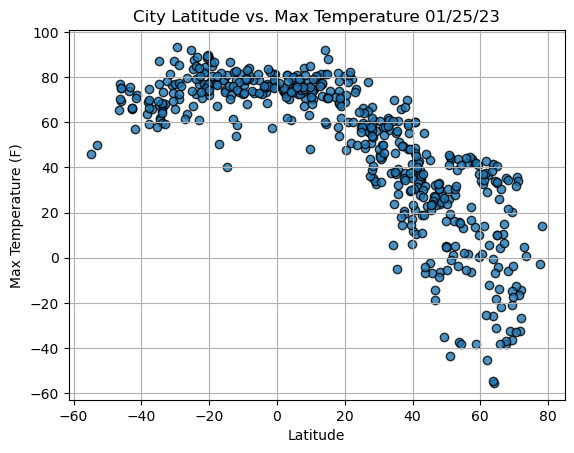

In [19]:
# Build the scatter plot for lat vs max temp
plt.scatter(lats,
           max_temp,
           edgecolor="black", linewidths=1,marker="o",alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()
            


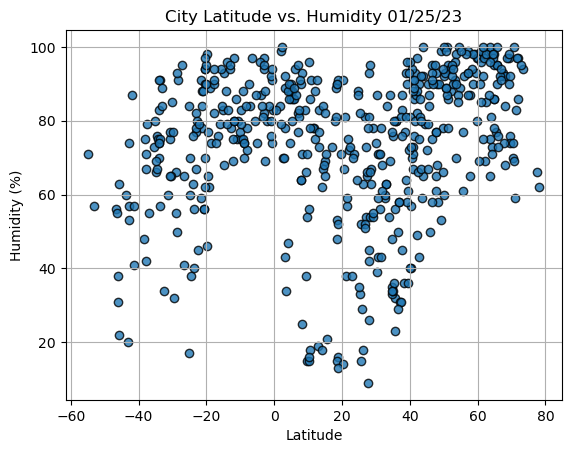

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

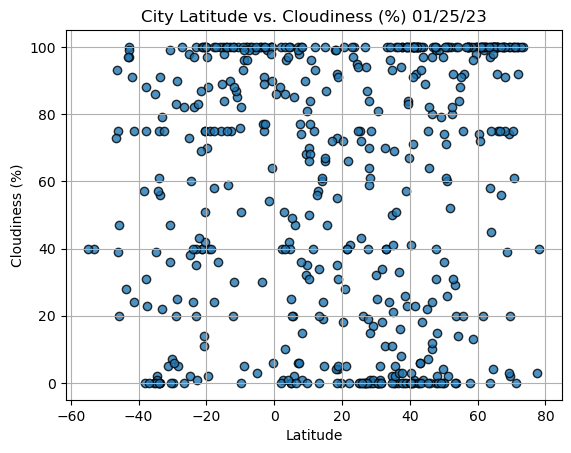

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

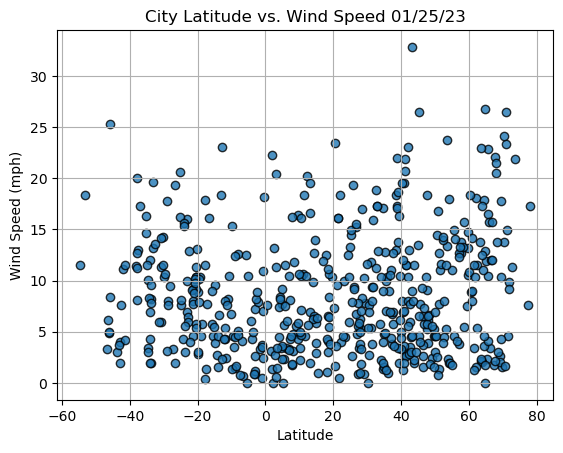

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()